# Exploring Spotify's Top 100 Tracks From 2018

This was a personal project that I did as a part of exploring various uses of Python packages such as matploblib, numpy, pandas and seaborn

The dataset for this project was obtained from Kaggle.com which was extracted from the Spotify Web API. 

In this project, I will be looking at the various factors that come into determining what makes a song a 'top track'. 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
%matplotlib inline

In [3]:
df = pd.read_csv('top2018.csv')

In [4]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


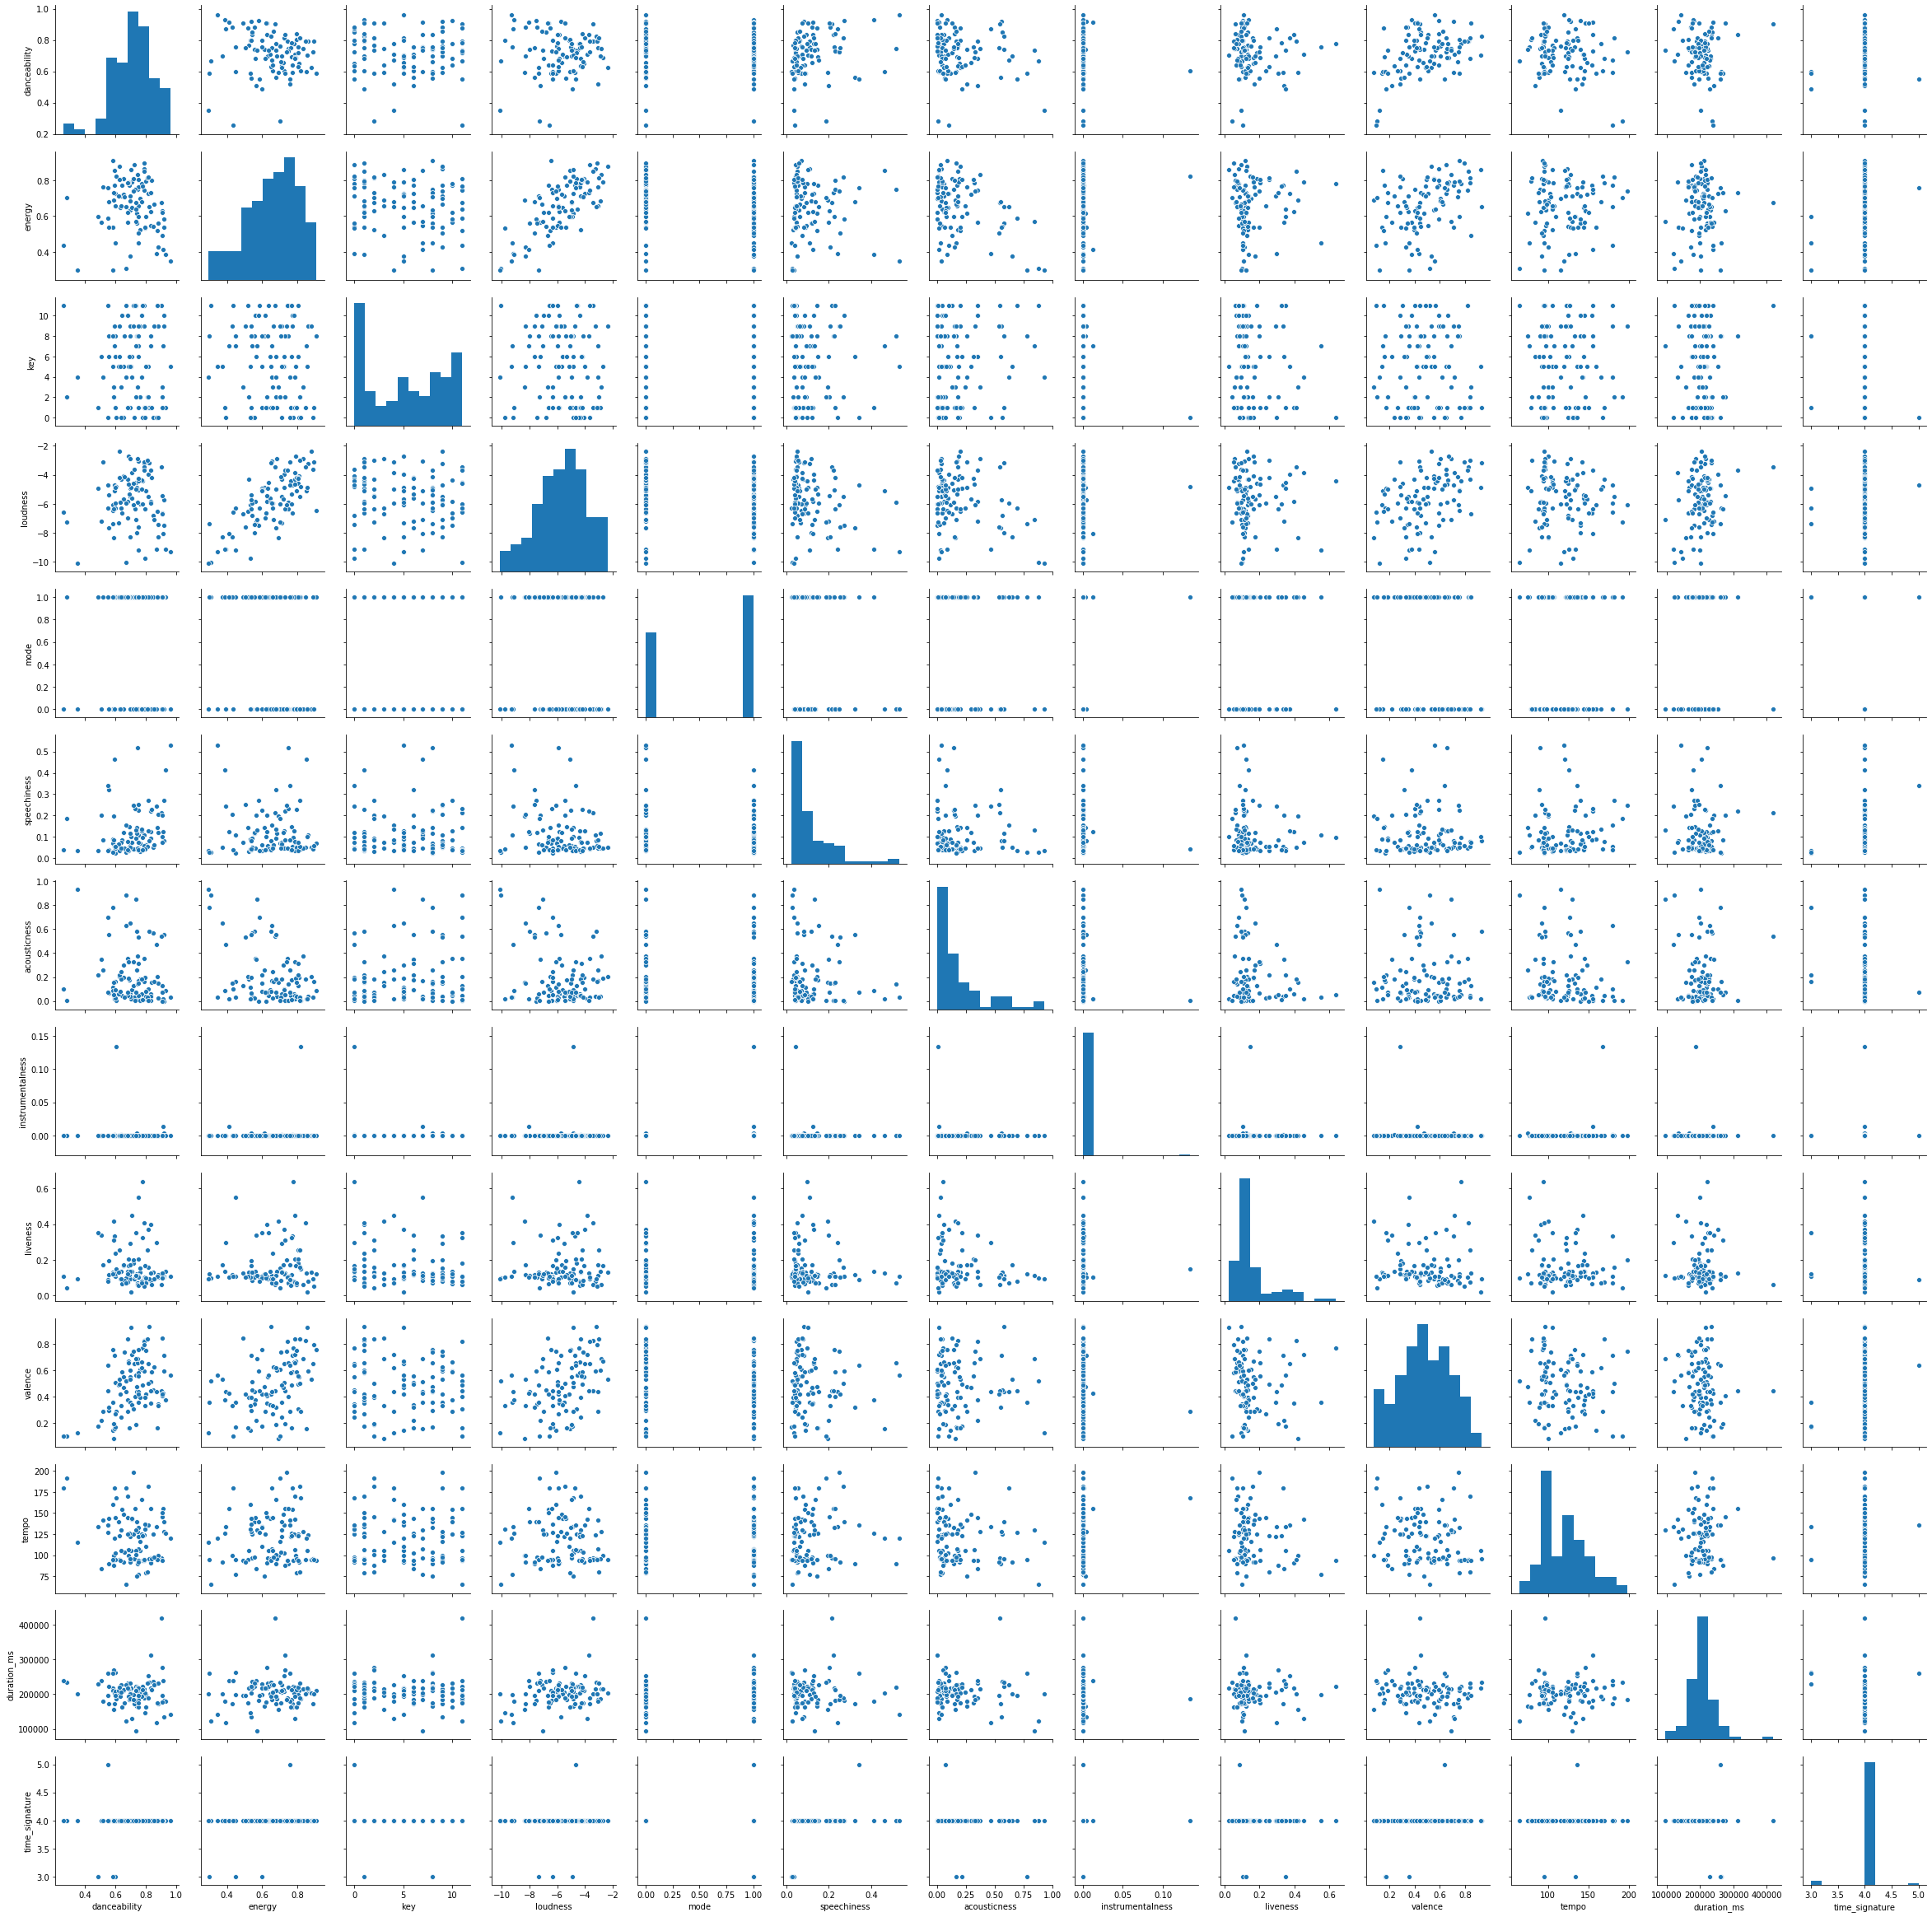

In [6]:
sns.pairplot(df)

To make the comparisons easier, we will get rid of categorical columns such as 'id', 'name'and 'artists'. 

In [7]:
df_q = df.drop(['id','name','artists'],axis=1)

In [8]:
df_q.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [9]:
# Create a dataframe with the correlations between each column 
corr_1 = df_q.corr()

In [10]:
corr_1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.072582,-0.051759,0.015517,-0.058019,0.227075,-0.134374,-0.066592,-0.038761,0.413855,-0.195012,-0.068368,0.119421
energy,-0.072582,1.000000,-0.136345,0.732719,-0.117555,-0.073591,-0.421209,0.093684,0.050542,0.382434,0.062272,0.073017,0.255235
key,-0.051759,-0.136345,1.000000,-0.105309,-0.141568,0.019583,0.141590,-0.136607,-0.125443,-0.032622,0.003737,0.046144,-0.087096
loudness,0.015517,0.732719,-0.105309,1.000000,-0.110178,-0.252037,-0.269742,0.036248,0.000006,0.407760,-0.035156,0.265310,0.072301
mode,-0.058019,-0.117555,-0.141568,-0.110178,1.000000,-0.150076,-0.030028,0.089667,0.024428,-0.210599,-0.011911,0.055411,-0.083782


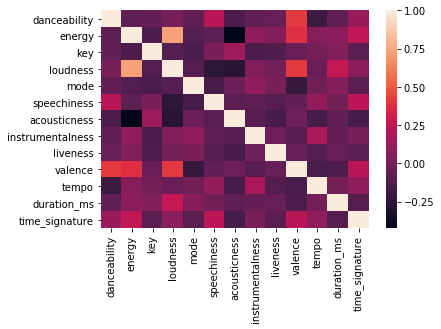

In [11]:
sns.heatmap(corr_1)

By just observing the heatmap, we can tell that 'loudness' and 'energy' have a high correlation, but just to be more accurate, we will create a function that can be used to find the nth most correlating factors. 

In [12]:
numpy_matrix = corr_1.as_matrix()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [13]:
numpy_matrix.shape

(13, 13)

In [14]:
def nth_largest(mat,n):
    for row in mat:
         yield sorted(row)[-n]
            

def find_ind(a):
    # takes a list a 
    max_a = max(a)
    r = a.index(max_a)
    c = list(numpy_matrix[r]).index(max_a)
    return (corr_1.columns[r],corr_1.columns[c])

In [15]:
find_ind((list(nth_largest(numpy_matrix,2))))

('energy', 'loudness')

In [16]:
max(list(nth_largest(numpy_matrix,2)))
## energy and loudness have the highest correlation 



0.7327190534739778

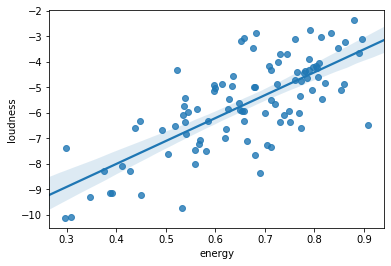

In [17]:
sns.regplot(x='energy',y='loudness',data=df)
# as we can see, energy and loudness do have a strong correlation. 

In [18]:
find_ind((list(nth_largest(numpy_matrix,3))))

('loudness', 'valence')

In [19]:
max(list(nth_largest(numpy_matrix,3)))



0.40776027277651744

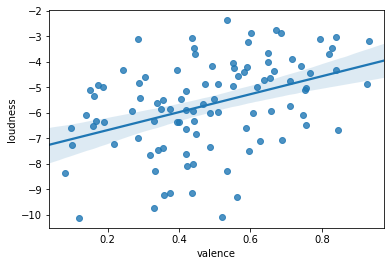

In [20]:
sns.regplot(x='valence',y='loudness',data=df)
# the next highest correlating factors are 'loudness' and 'valence'